In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [199]:
batters = pd.read_json('batters_stats.json')
batters = batters[['year','name','pos','age','status','prev_team','new_team','dollars','years_signed','stats_1yr_ago','stats_2yr_ago','stats_3yr_ago']]

# Data Cleaning

In [200]:
# cast the dollars column from string to int
if batters['dollars'].dtype == 'object':
    batters['dollars'] = batters['dollars'].str.replace('$','').str.replace(',','')
    
batters['dollars'] = batters['dollars'].astype('int64')

In [201]:
batters.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed,stats_1yr_ago,stats_2yr_ago,stats_3yr_ago
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,8500000,1,"{'GP': '98', 'AB': '345', 'R': '52', 'H': '104...","{'GP': '123', 'AB': '427', 'R': '67', 'H': '13...","{'GP': '155', 'AB': '601', 'R': '106', 'H': '1..."
1,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,8000000,2,"{'GP': '122', 'AB': '440', 'R': '61', 'H': '13...","{'GP': '114', 'AB': '426', 'R': '61', 'H': '12...","{'GP': '124', 'AB': '399', 'R': '49', 'H': '98..."
2,2006,Paul Bako,C,33,Signed,Royals,Orioles,900000,1,"{'GP': '56', 'AB': '153', 'R': '7', 'H': '32',...","{'GP': '13', 'AB': '40', 'R': '1', 'H': '10', ...","{'GP': '49', 'AB': '138', 'R': '13', 'H': '28'..."
3,2006,Rod Barajas,C,30,Signed,Rangers,Phillies,2500000,1,"{'GP': '97', 'AB': '344', 'R': '49', 'H': '88'...","{'GP': '120', 'AB': '410', 'R': '53', 'H': '10...","{'GP': '108', 'AB': '358', 'R': '50', 'H': '89..."
4,2006,Gary Bennett,C,34,Signed,Cardinals,Cardinals,900000,1,"{'GP': '60', 'AB': '157', 'R': '13', 'H': '35'...","{'GP': '68', 'AB': '199', 'R': '11', 'H': '44'...","{'GP': '75', 'AB': '219', 'R': '18', 'H': '49'..."


# Data Analysis

In [202]:
# replace 'None' values with zeros
for index, row in batters.iterrows():
    for key, value in row['stats_1yr_ago'].items():
        if value == 'None':
            row['stats_1yr_ago'][key] = '0'
    for key, value in row['stats_2yr_ago'].items():
        if value == 'None':
            row['stats_2yr_ago'][key] = '0'
    for key, value in row['stats_3yr_ago'].items():
        if value == 'None':
            row['stats_3yr_ago'][key] = '0'

In [203]:
# create a column for the 3-year total of each batter stat
for stat in batters['stats_1yr_ago'][0]:
    stat_list = []
    
    for index, row in batters.iterrows():
        stat_1 = float(row['stats_1yr_ago'][stat])
        stat_2 = float(row['stats_2yr_ago'][stat])
        stat_3 = float(row['stats_3yr_ago'][stat])   
        stat_list.append(stat_1 + stat_2 + stat_3)

    batters[stat + '_3yr'] = stat_list

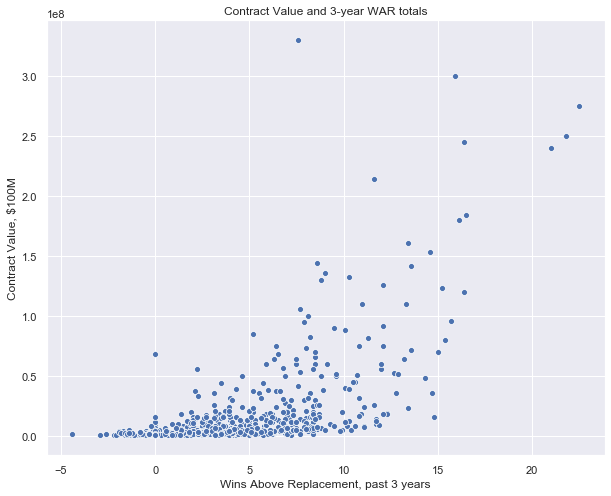

In [204]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x='WAR_3yr',y='dollars',data=batters, ax=ax)
plt.title('Contract Value and 3-year WAR totals')
plt.xlabel('Wins Above Replacement, past 3 years')
plt.ylabel('Contract Value, $100M')

plt.show()

# Linear Relationships

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(0,14):
    ax = fig.add_subplot(4,5,i+1)

    col = batters.loc[:,'GP_3yr':].columns[i]
    stat = col.replace('_3yr','')
    
    sns.scatterplot(x=col,y='dollars',data=batters, ax=ax)
    ax.set_yticks([0,100000000,200000000,300000000])
    ax.set_yticklabels(['','','','$300M'], rotation=90)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(stat)

plt.suptitle('Contract Value by 3-Year Stat Totals')
plt.show()